In [1]:
import pandas as pd
import os
import json

In [2]:
os.listdir("training_data/training_data/")

['.DS_Store', 'CT json', 'dev.json', 'train.json']

In [3]:
with open("training_data/training_data/train.json") as obj:
    data = json.load(obj)

In [4]:
list(data.keys())[0:10]

['5bc844fc-e852-4270-bfaf-36ea9eface3d',
 '86b7cb3d-6186-4a04-9aa6-b174ab764eed',
 'dbed5471-c2fc-45b5-b26f-430c9fa37a37',
 '20c35c89-8d23-4be3-b603-ac0ee0f3b4de',
 'f17cb242-419d-4f5d-bfa4-41494ed5ac0e',
 'fc5c4554-7ce9-4c16-b374-a3cd9d15b021',
 '96b77cdd-aa9f-4770-8447-8a04d9ca5da7',
 'c73faed2-371b-4238-bf7d-293fae380203',
 '8765009d-ffc4-4395-ab7a-11ecdfd43a40',
 '0ad7293d-df35-42e8-881d-f2afc3f7d3fd']

In [5]:
types = []
for obv in data:
    types.append(data[obv]["Type"])

In [6]:
set(types)

{'Comparison', 'Single'}

{'Type': 'Comparison',
 'Section_id': 'Intervention',
 'Primary_id': 'NCT00852930',
 'Secondary_id': 'NCT02308020',
 'Statement': 'Laser Therapy is in each cohort of the primary trial and the secondary trial, along with neoadjuvant chemotherapy.',
 'Label': 'Contradiction',
 'Primary_evidence_index': [0, 1, 2, 3, 4, 5, 6, 7],
 'Secondary_evidence_index': [0, 1, 2, 3, 4, 5, 6]}

In [318]:
n = 4
section = data[list(data.keys())[n]]['Section_id']

In [319]:
data[list(data.keys())[n]]

{'Type': 'Comparison',
 'Section_id': 'Intervention',
 'Primary_id': 'NCT00852930',
 'Secondary_id': 'NCT02308020',
 'Statement': 'Laser Therapy is in each cohort of the primary trial and the secondary trial, along with neoadjuvant chemotherapy.',
 'Label': 'Contradiction',
 'Primary_evidence_index': [0, 1, 2, 3, 4, 5, 6, 7],
 'Secondary_evidence_index': [0, 1, 2, 3, 4, 5, 6]}

In [320]:
statement = data[list(data.keys())[n]]['Statement']

In [321]:
statement

'Laser Therapy is in each cohort of the primary trial and the secondary trial, along with neoadjuvant chemotherapy.'

In [322]:
primary_uuid = data[list(data.keys())[n]].get("Primary_id")
secondary_uuid = data[list(data.keys())[n]].get("Secondary_id", "NoID")

In [323]:
with open("training_data/training_data/CT json/%s.json"%primary_uuid) as puid:
    primary_ctr = json.load(puid)

In [324]:
p = "".join(primary_ctr[section])

In [325]:
p

'INTERVENTION 1:   Laser Therapy Alone  therapist administered laser treatment  laser: therapist administered laserINTERVENTION 2:   Mld Alone  therapist administered manual lymphatic drainage  manual lymphatic drainage: therapist administered massage therapy'

In [326]:
with open("training_data/training_data/CT json/%s.json"%secondary_uuid) as suid:
    secondary_ctr = json.load(suid)

In [327]:
s = "".join(secondary_ctr[section])

In [328]:
s

'INTERVENTION 1:   Part A Abemaciclib: HR+, HER2+ Breast Cancer  Abemaciclib 200 mg was administered orally once every 12 hours on days 1-21 of a 21-day cycle when administered as a single agent or in combination with endocrine therapy (ET). Participants with hormone receptor positive HR+, HER2+ breast cancer receiving concurrent trastuzumab, 150 mg abemaciclib was given orally once every 12 hours on days 1-21 of a 21-day cycle. Participants may continue to receive treatment until discontinuation criteria are met.INTERVENTION 2:   Part B Abemaciclib: HR+, HER2- Breast Cancer  Abemaciclib 200 mg was administered orally once every 12 hours on days 1-21 of a 21-day cycle when administered as a single agent or for in combination with endocrine therapy (ET).  Participants may continue to receive treatment until discontinuation criteria are met.'

In [113]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("d4data/biomedical-ner-all")
model = AutoModelForTokenClassification.from_pretrained("d4data/biomedical-ner-all")

C:\Users\Akhilesh\Anaconda3\envs\a5\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
tokenizer_config.json: 100%|██████████████████████████████████████████████████████████████████████████████████████████████| 373/373 [00:00<00:00, 61.3kB/s]
C:\Users\Akhilesh\Anaconda3\envs\a5\lib\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Akhilesh\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support

In [133]:
sentence = statement

In [235]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForTokenClassification

tokenizer = AutoTokenizer.from_pretrained("d4data/biomedical-ner-all")
model = AutoModelForTokenClassification.from_pretrained("d4data/biomedical-ner-all")

In [195]:
with open("training_data/training_data/train.json") as obj:
        data = json.load(obj)

In [207]:
sections = []
aes = []
elg = []
inter = []
res = []
for _,v in data.items():
    sections.append(v['Section_id'])
    if v['Section_id'] == "Adverse Events":
        aes.append(v)
    if v['Section_id'] == "Eligibility":
        elg.append(v)
    if v['Section_id'] == "Intervention":
        inter.append(v)
    if v['Section_id'] == "Results":
        res.append(v)
        

## What is the distribution of the sections?

In [210]:
from collections import Counter
Counter(sections)

Counter({'Adverse Events': 496,
         'Eligibility': 486,
         'Intervention': 396,
         'Results': 322})

## Section Wise analysis

### 1. In Each Section what are the single and comparision types?

In [230]:
def get_types(li):
    single = []
    comparison = []
    for d in li:
        if d['Type'] == "Comparison":
            comparison.append(d)
        if d['Type'] == "Single":
            single.append(d)
    print("Single ->", len(single), "; Comparison -> ", len(comparison))
    return single, comparison

In [232]:
print("Adverse Events")
single_ae, comparison_ae = get_types(aes)
print("Eligibility")
single_elg, comparison_elg = get_types(elg)
print("Intervention")
single_inter, comparison_elg = get_types(inter)
print("Results")
single_res, comparison_res = get_types(res)

Adverse Events
Single -> 309 ; Comparison ->  187
Eligibility
Single -> 317 ; Comparison ->  169
Intervention
Single -> 155 ; Comparison ->  241
Results
Single -> 254 ; Comparison ->  68


In [243]:
def get_ctr_data(primary_uuid = None, secondary_uuid = None, section_id = None):
        if primary_uuid:
            with open("training_data/training_data/CT json/%s.json"%primary_uuid) as puid:
                primary_ctr = json.load(puid)
                p = "".join(primary_ctr[section_id])
        else:
            p = ""
        if secondary_uuid:
            with open("training_data/training_data/CT json/%s.json"%secondary_uuid) as suid:
                secondary_ctr = json.load(suid)
                s = "".join(secondary_ctr[section_id])
        else:
            s = ""

        return p, s

def get_updated_sentence(premise_ner, sentence):
      premise_updated = ''
      for d in premise_ner:

        premise_updated = premise_updated + d['entity_group'] + ' '

      return premise_updated
    
def build_dataset_from_li(li):
    from tqdm import tqdm
    tokenizer = AutoTokenizer.from_pretrained("d4data/biomedical-ner-all")
    model = AutoModelForTokenClassification.from_pretrained("d4data/biomedical-ner-all")
    pipe = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple", device=0) # pass device=0 if using gpu

    label_map = {"Contradiction":0 , "Entailment":1}
    final_data = []
    df_text = pd.DataFrame(columns = ["Primary_Premise", "Secondary_Premise", "Hypothesis", "NER_Tags"])
    primary_premise = []
    secondary_premise = []
    hypothesis = []
    ner_tags = []
    for val in tqdm(li):
        section_id = val.get('Section_id')
        primary_uuid = val.get('Primary_id')
        secondary_uuid = val.get('Secondary_id')
        statement = val.get('Statement')
        label = val.get('Label')
        p, s = get_ctr_data(primary_uuid=primary_uuid, secondary_uuid=secondary_uuid, section_id=section_id)
        primary_ner = pipe(p)
        secondary_ner = pipe(s)
        primary_updated = get_updated_sentence(primary_ner, p)
        secondary_updated = get_updated_sentence(secondary_ner, s)

        primary_premise.append(p)
        secondary_premise.append(s)
        hypothesis.append(statement)
        ner_tags.append(primary_updated+secondary_updated)

    df_text["Primary_Premise"] = primary_premise
    df_text["Secondary_Premise"] = secondary_premise
    df_text["Hypothesis"] = hypothesis
    df_text["NER_Tags"] = ner_tags
    return df_text        

In [253]:
#!pip install wordcloud seaborn

In [254]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
nltk.download('punkt')

# Load your text data into a DataFrame
# For example, assuming you have a CSV file named 'text_data.csv' with a 'text' column


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akhilesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [348]:
# Display basic information about the DataFrame
def plot_eda_results(df, col_name):    
    
    # Distribution of text lengths
    df['text_length'] = df[col_name].apply(lambda x: len(x.split(" ")))
    print("\nDistribution of text lengths:")
    print(df['text_length'].describe())
    
    # Plot a histogram of text lengths
    plt.figure(figsize=(10, 6))
    sns.histplot(df['text_length'], bins=50, kde=True)
    plt.title('Distribution of Text Lengths')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()
    
    # Word cloud visualization
    try:
        all_text = ' '.join(df[col_name].astype(str))
        wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(all_text)
      
        
        plt.figure(figsize=(12, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Text Data')
        plt.show()
    except:
        print("Word cloud too small")

    try:
        # Tokenization and frequency distribution
        tokens = word_tokenize(all_text)
        fdist = FreqDist(tokens)
        
        # Plot the most common words
        plt.figure(figsize=(12, 6))
        fdist.plot(30, cumulative=False, title = 'Top 30 Most Common Words')
        fdist.xticks(rotation=45)
        plt.title('')        
        plt.show()
    except:
        print("Freq plot too small")

In [261]:
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akhilesh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akhilesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [345]:
stop_words = set(stopwords.words('english'))
def clean_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Convert to lowercase, remove non-alphabetic characters, and eliminate stop words
    tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    
    # Remove punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Remove numbers
    tokens = [word for word in tokens if not word.isdigit()]
    
    return ' '.join(tokens)

def show_results(df, col_name):
    temp_df = pd.DataFrame()
    temp_df["cleaned_text"] = df[col_name].apply(clean_text)
    
    plot_eda_results(temp_df, "cleaned_text")

def visualize_list(list_):
    df = build_dataset_from_li(list_)
    for i in df.columns:
        print(i)
        print(100*"*")
        show_results(df, col_name=i)

In [346]:
df = build_dataset_from_li(single_ae)

  2%|█▉                                                                                                                    | 5/309 [00:00<00:18, 16.59it/s]C:\Users\Akhilesh\Anaconda3\envs\a5\lib\site-packages\transformers\pipelines\base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 309/309 [00:09<00:00, 32.42it/s]


In [338]:
df.head()

,Primary_Premise,Secondary_Premise,Hypothesis,NER_Tags
0,Adverse Events 1: Total: 12/32 (37.50%) Anae...,,"Most of the cases of CHF in the primary trial,...",Sign_symptom Lab_value Sign_symptom Lab_value ...
1,Adverse Events 1: Total: 8/24 (33.33%) Restr...,,Less than 1/4 patients in the primary trial ex...,Sign_symptom Lab_value Detailed_description Hi...
2,Adverse Events 1: Total: 12/63 (19.05%) Febr...,,A single patient in the primary trial experien...,Sign_symptom Lab_value Lab_value Sign_symptom ...
3,Adverse Events 1: Total: 26/69 (37.68%) Anae...,,Neutropenia affected the majority of patients ...,Sign_symptom Lab_value Sign_symptom Lab_value ...
4,Adverse Events 1: Total: 158/482 (32.78%) An...,,There were 7 more cases of Anaemia and 1 more ...,Sign_symptom Lab_value Sign_symptom Lab_value ...


  2%|█▉                                                                                                                    | 5/309 [00:00<00:12, 24.92it/s]C:\Users\Akhilesh\Anaconda3\envs\a5\lib\site-packages\transformers\pipelines\base.py:1101: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 309/309 [00:09<00:00, 31.75it/s]


Primary_Premise
****************************************************************************************************

Distribution of text lengths:
count    309.000000
mean      32.216828
std       12.115579
min        6.000000
25%       21.000000
50%       38.000000
75%       42.000000
max       52.000000
Name: text_length, dtype: float64


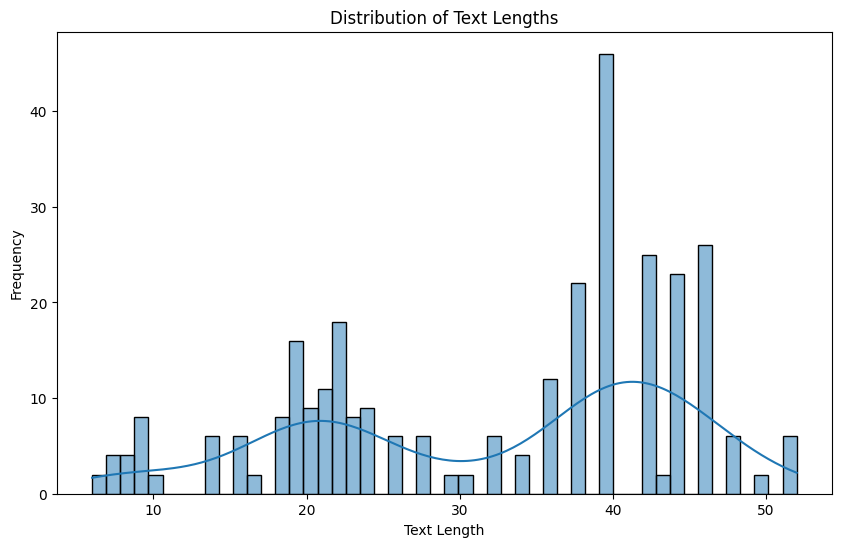

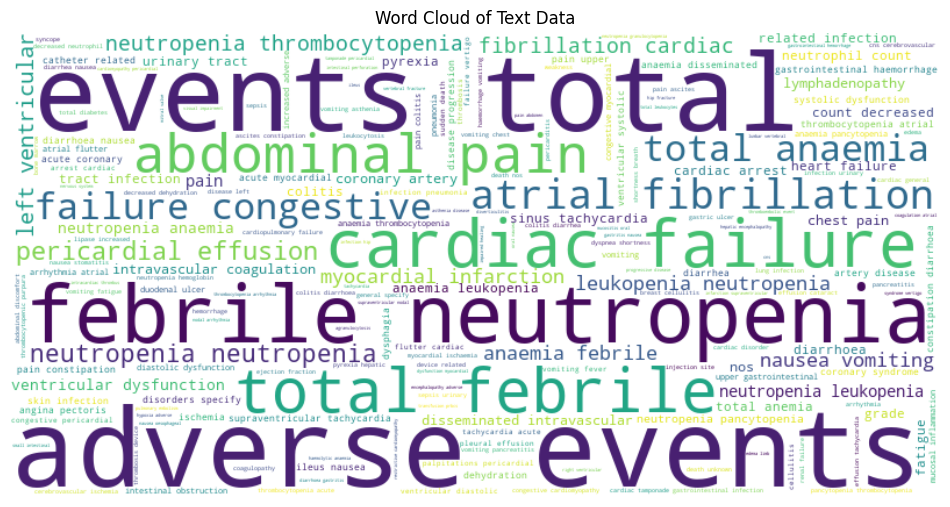

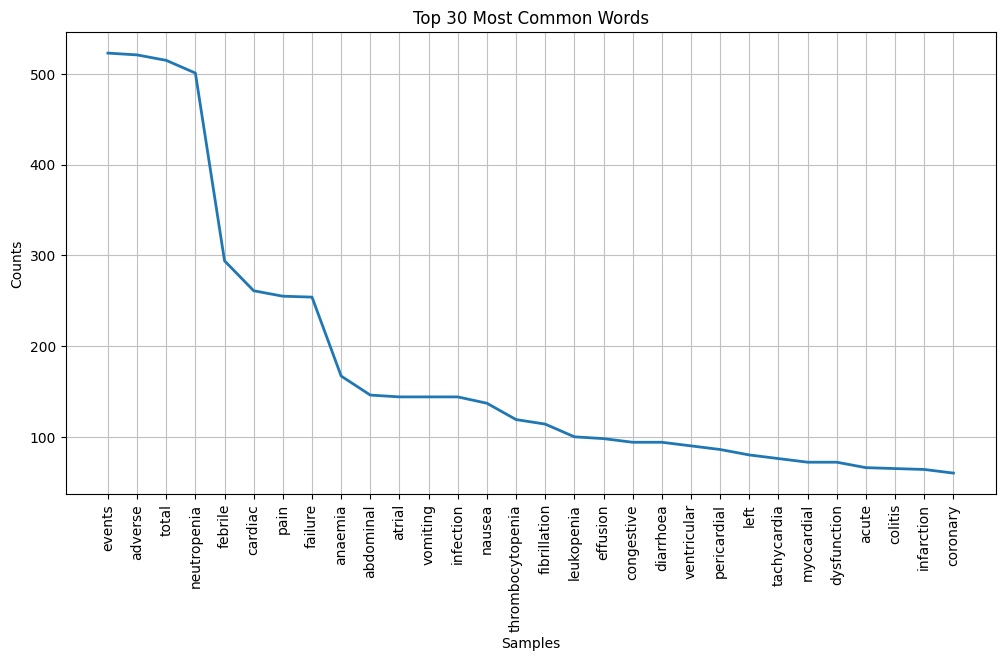

Freq plot too small
Secondary_Premise
****************************************************************************************************

Distribution of text lengths:
count    309.0
mean       1.0
std        0.0
min        1.0
25%        1.0
50%        1.0
75%        1.0
max        1.0
Name: text_length, dtype: float64


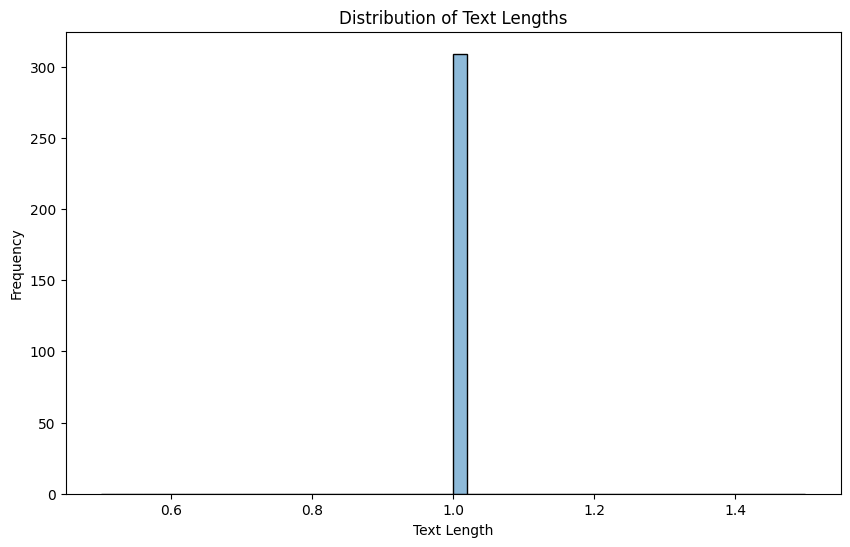

Word cloud too small


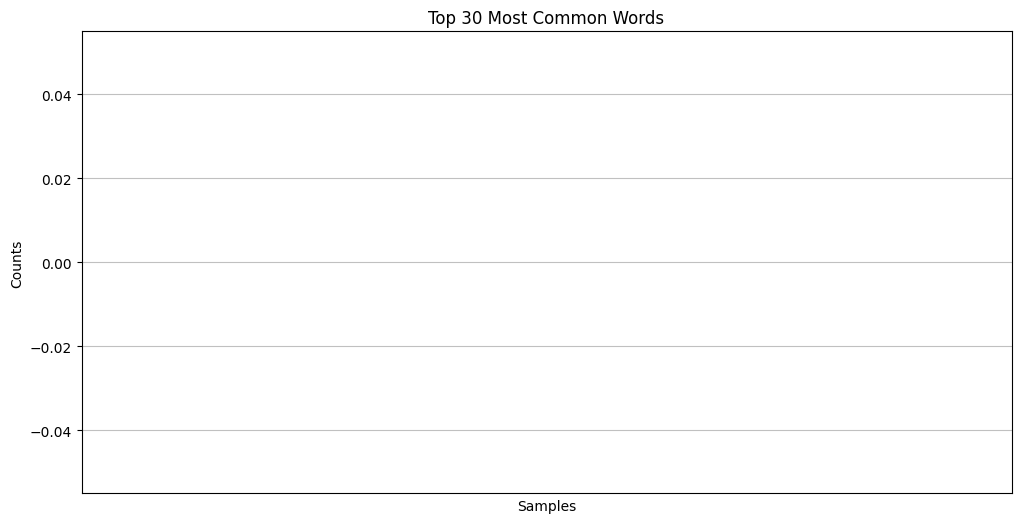

Freq plot too small
Hypothesis
****************************************************************************************************

Distribution of text lengths:
count    309.000000
mean       7.996764
std        2.164499
min        4.000000
25%        7.000000
50%        8.000000
75%        9.000000
max       18.000000
Name: text_length, dtype: float64


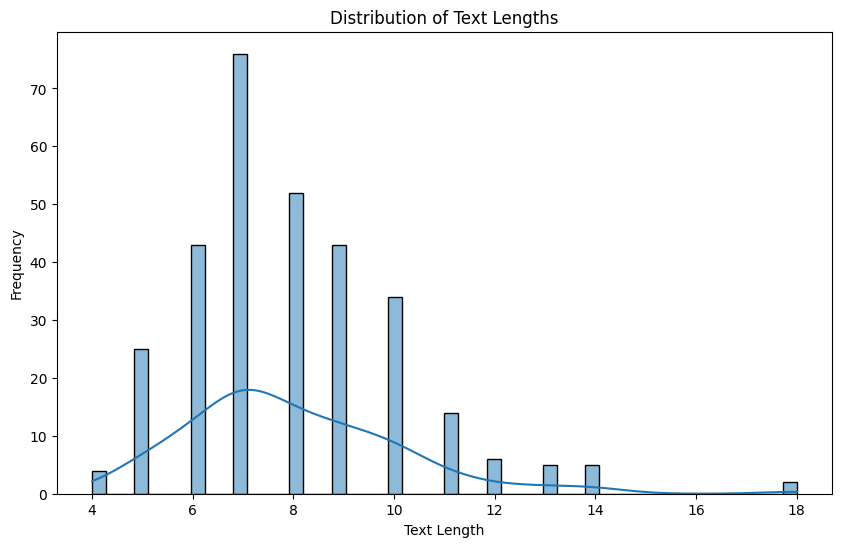

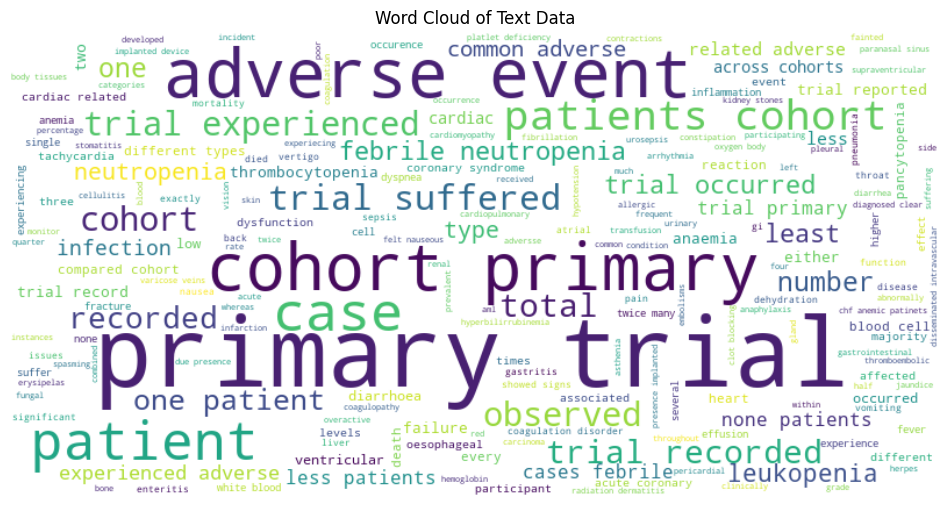

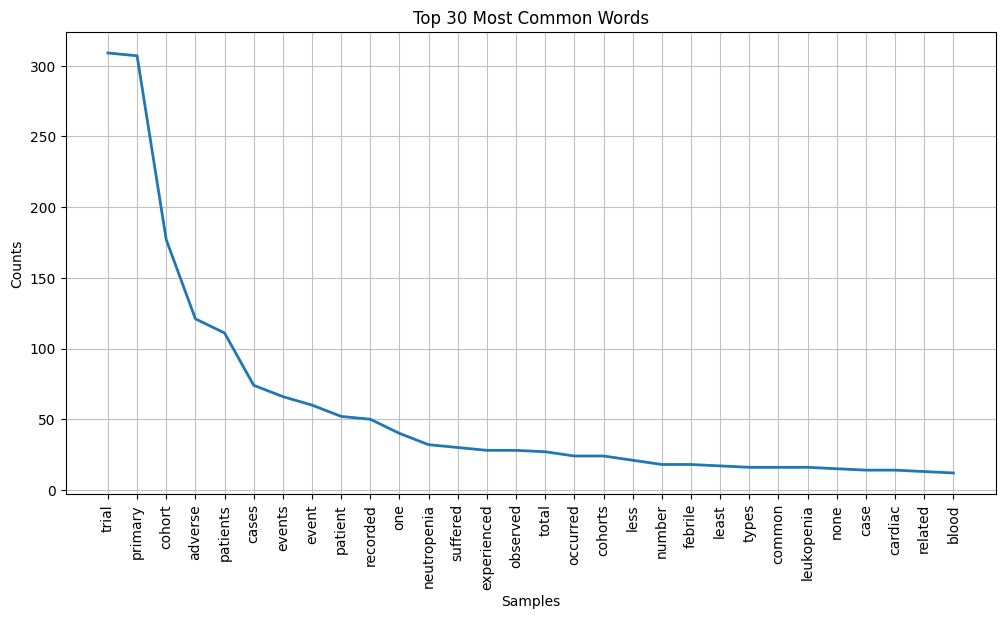

Freq plot too small
NER_Tags
****************************************************************************************************

Distribution of text lengths:
count    309.000000
mean       1.262136
std        1.056469
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        8.000000
Name: text_length, dtype: float64


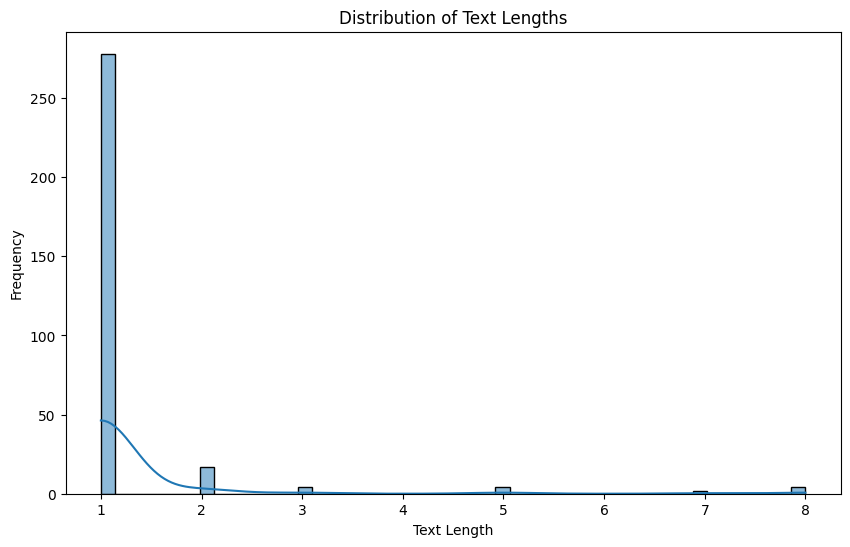

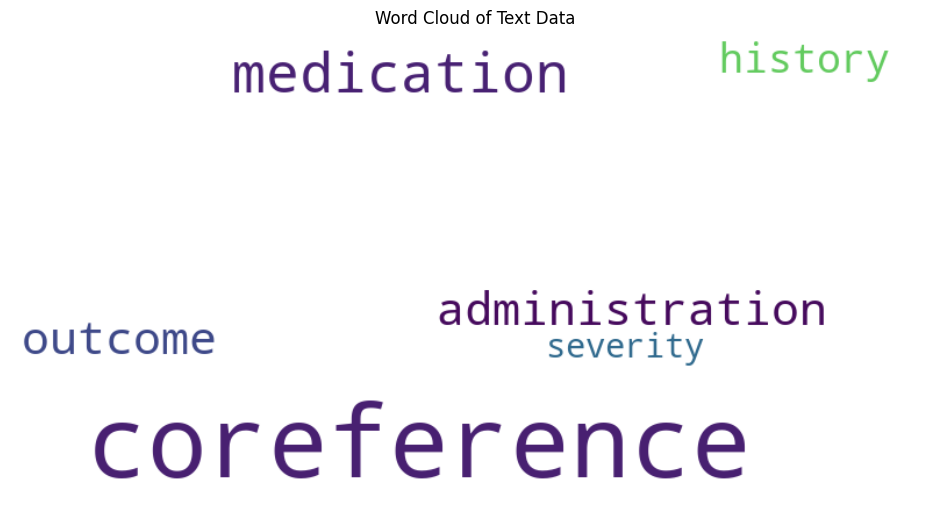

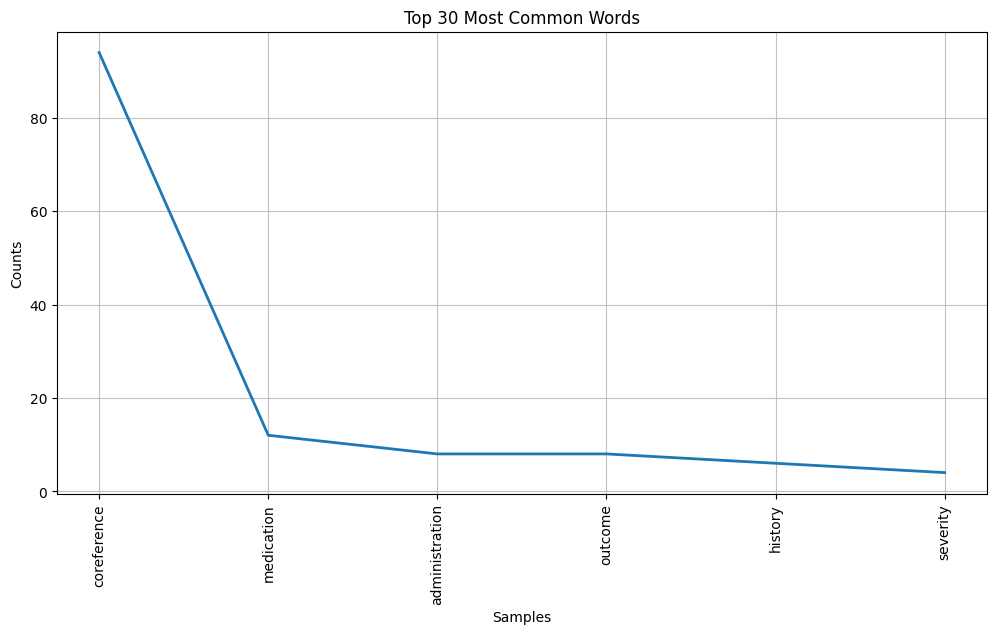

Freq plot too small


In [349]:
visualize_list(single_ae)